In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
print("Package Loaded")

Package Loaded



Type of 'train_X' is <type 'numpy.ndarray'>
Shape of 'train_X' is (1, 20)
("Type of 'train_Y' is ", <type 'numpy.ndarray'>)
("Shape of 'train_Y' is", (1, 20))


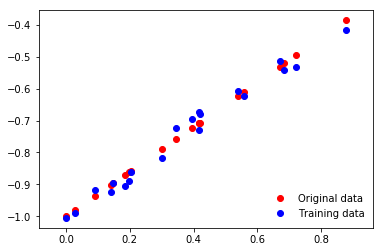

In [2]:
np.random.seed(1)
def f(x, a, b):
    n = train_X.size
    vals = np.zeros((1, n))
    for i in range(0, n):
        ax = np.multiply(a, x.item(i))
        val = np.add(ax, b)
        vals[0, i] = val
    return vals

Wref = 0.7
bref = -1.
n = 20
noise_var = 0.001
train_X = np.random.random((1, n))
ref_Y = f(train_X, Wref, bref)
train_Y = ref_Y + np.sqrt(noise_var)*np.random.randn(1, n)
n_samples = train_X.size

print ""
print "Type of 'train_X' is %s" % type(train_X)
print "Shape of 'train_X' is", train_X.shape
print ("Type of 'train_Y' is ", type(train_Y))
print ("Shape of 'train_Y' is", train_Y.shape)

plt.figure(1)
plt.plot(train_X[0, :], ref_Y[0, :], 'ro', label='Original data')
plt.plot(train_X[0, :], train_Y[0, :], 'bo', label='Training data')
plt.axis('equal')
plt.legend(loc='lower right')

In [3]:
temp_X = np.insert(train_X, 0, 1, axis=0)
temp_Y = train_Y

def h(X, w):
    return tf.matmul(w, X)

def costF(X, Y, w):
    return tf.matmul((h(X, w) - Y), tf.transpose(h(X, w) - Y)) / (2*n_samples)

X = tf.placeholder(tf.float64, name="input")
Y = tf.placeholder(tf.float64, name="output")
W = tf.cast(tf.Variable(tf.random_normal([1, 2]), "weight"), tf.float64)

#cost = tf.matmul(tf.transpose(h(X, W) - Y), (h(X, W) - Y)) / (2*n_samples)

learning_rate = 0.01
optimizer = tf.train.GradientDescentOptimizer(learning_rate)#.minimize(cost)
#optimizer.minimize(costF(X, Y, W))
train = optimizer.minimize(costF(X, Y, W))

init = tf.initialize_all_variables()

In [4]:
sess = tf.Session()

sess.run(init)
# print sess.run(costF(X, Y, W), feed_dict={X:temp_X, Y:temp_Y})
for step in range(20001):
    feed = {X:temp_X, Y:temp_Y}
    sess.run(train, feed)
    # sess.run(train, feed_dict={X:temp_X, Y:temp_Y})
    if step % 1000 == 0:
        print step, sess.run(costF(X, Y, W), feed), sess.run(W)

0 [[ 3.23753961]] [[ 1.27151823  1.41753995]]
1000 [[ 0.00047251]] [[-0.9694351   0.61197323]]
2000 [[ 0.00035014]] [[-0.98195297  0.64424044]]
3000 [[ 0.00030628]] [[-0.98943305  0.66356188]]
4000 [[ 0.00029057]] [[-0.99391085  0.67512786]]
5000 [[ 0.00028494]] [[-0.99659109  0.68205136]]
6000 [[ 0.00028292]] [[-0.99819547  0.68619561]]
7000 [[ 0.0002822]] [[-0.99915522  0.68867576]]
8000 [[ 0.00028194]] [[-0.99972957  0.69015944]]
9000 [[ 0.00028184]] [[-1.00007021  0.69104648]]
10000 [[ 0.00028181]] [[-1.0002768  0.6915766]]
11000 [[ 0.0002818]] [[-1.00040197  0.69188726]]
12000 [[ 0.00028179]] [[-1.00047719  0.69208974]]
13000 [[ 0.00028179]] [[-1.00051749  0.69219929]]
14000 [[ 0.00028179]] [[-1.00053942  0.69225889]]
15000 [[ 0.00028179]] [[-1.00055122  0.6922912 ]]
16000 [[ 0.00028179]] [[-1.00055122  0.6922912 ]]
17000 [[ 0.00028179]] [[-1.00055122  0.6922912 ]]
18000 [[ 0.00028179]] [[-1.00055122  0.6922912 ]]
19000 [[ 0.00028179]] [[-1.00055122  0.6922912 ]]
20000 [[ 0.000281

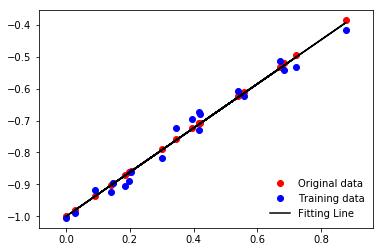

In [14]:
plt.figure(1)
plt.plot(train_X[0, :], ref_Y[0, :], 'ro', label='Original data')
plt.plot(train_X[0, :], train_Y[0, :], 'bo', label='Training data')
plt.plot(train_X[0, :], sess.run(h(X, W), feed_dict = {X:temp_X})[0, :], 'k', label='Fitting Line')
plt.axis('equal')
plt.legend(loc='lower right')